# Actividad 16.2
## Eliú Moreno Ramírez

Resuelva las siguiente ecuación diferencial parcial de tipo elíptico.

$\frac{\partial ²u}{\partial x²}+\frac{\partial ²u}{\partial y²}=0$

$u(0,y)=10$ ; $0<=y<=3$

$u(2,y)=20sen(\pi y)$ ; $0<=y<=3$

$\frac{\partial u(x,0)}{\partial y}=20$ ; $0<=x<=2$

$u(x,3)=25x$  ; $0<=x<=2$

In [1]:
# Programa para resolver una EDP elíptica
#con condicones constates en lo bordes
import numpy as np
Ta=10; Tb=20; Tc=10; Td=25 #Bordes izq,der,abajo,arriba
Dery0=20
Lx=2
Ly=3
dx=dy=0.1
n=int(Ly/dy-1)                       #Puntos interiores en dirección hor(X)
m=int(Lx/dx-1)                       #Puntos interiores en dirección ver (Y)
miter=1000                 #Max de iteraciones
e=0.001                     #Error de truncamiento relativo 0.1%
u=np.zeros([n+2,m+2])
for j in range(m+2):
    u[0][j]=Ta#Condición u(0,y)=10
    u[n+1][j]=Tb*np.sin(np.pi*dy*j)#condicion u(2,y)=20sen(pi*y)
for i in range(n+2):
    u[i][m+1]=Td*i*dx#condición u(X,3)=25*x

Conteo de iteraciones: 102


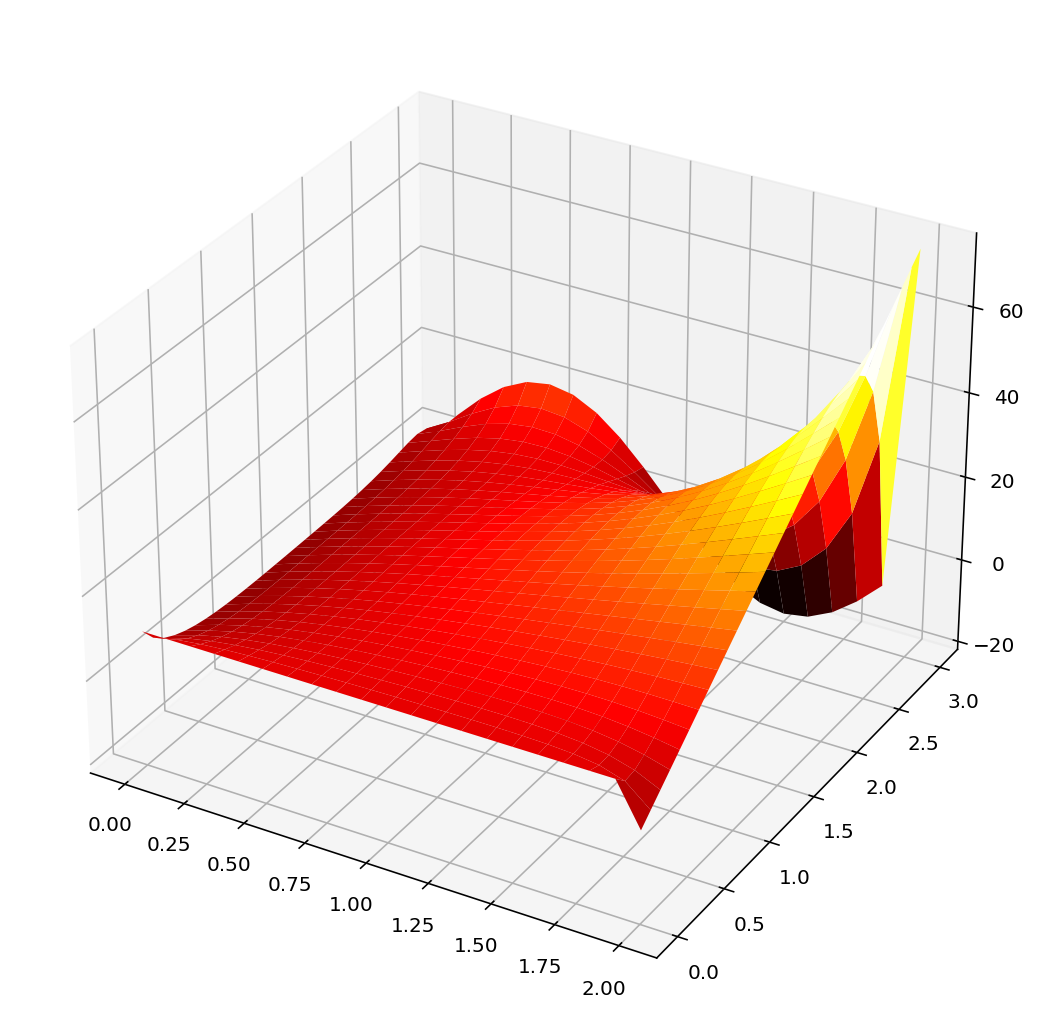

In [2]:
p=.25*(Ta+Tb+Tc+Td)
for i in range(1,n-1):
    for j in range(0,m-1):
        u[i][j]=p
k=0                             #conteo iteraciones
converge=0                      #señal de convergencia
while k<miter and converge==0:
    k=k+1
    t=u.copy()
    for i in range(1,n+1):
        for j in range(0,m+1):
            if j==0:
                u[i][j]=0.25*(u[i-1][j]+u[i+1][j]+2*u[i][j+1]-2*dy*Dery0)
            else:
                u[i][j]=0.25*(u[i-1][j]+u[i+1][j]+u[i][j-1]+u[i][j+1])
    if np.linalg.norm((u-t),np.inf)/np.linalg.norm(u,np.inf)<e:
        converge=1
if converge==1:
    #for i in range(n+2):       #Malla con la solución final
     #   print([float('%5.2f'%(u[i][j]))for j in range(m+2)])
    print('Conteo de iteraciones:',k) #Conteo de iteraciones
    from pylab import*
    from mpl_toolkits.mplot3d import Axes3D  #Grafico 3D
    fig=figure()
    ax=Axes3D(fig)
    x=np.arange(0,Lx+dx,dx)
    y=np.arange(0,Ly+dy,dy)
    X,Y=np.meshgrid(x,y)
    ax.plot_surface(X,Y,u,rstride=1,cstride=1,cmap='hot')
    show()
else:
    print('No coverge')